 # Gradient Boosting Regressor

# Using all predictors

In [8]:
# Import the required function from sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import GradientBoostingRegressor
onehot = OneHotEncoder()

car_data = pd.read_csv("cleaned_cardata.csv")
car_data['year'] = car_data['year'].astype('object')
#car_data.info()

car_data_cat = car_data[["model", "transmission", "fuelType"]]
onehot.fit(car_data_cat)
car_data_cat_onehot = pd.DataFrame(onehot.transform(car_data_cat).toarray(),
                                  columns = onehot.get_feature_names_out(car_data_cat.columns))

car_numeric = car_data[['mileage', 'engineSize', 'year']]
car_response = car_data['price']
car_data_ohe = pd.concat([car_numeric, car_data_cat_onehot, car_response],
                        sort = False, axis = 1).reindex(index=car_numeric.index)

# Extract Response and Predictors
y = pd.DataFrame(car_data_ohe['price'])
X = pd.DataFrame(car_data_ohe.drop('price', axis = 1))

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Using Gradient Boosting Regressor and loading it to variable classifier
classifier = GradientBoostingRegressor()  
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

# Fit using Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train.values.ravel())

# Predict 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy for all variables \t:", model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy for all variables \t:", model.score(X_test, y_test))
print()

#print("R2 for Train: ", r2_score(y_train, y_train_pred))
#print("R2 for Test: ", r2_score(y_test, y_test_pred))

Train Set : (14372, 35) (14372, 1)
Test Set  : (3594, 35) (3594, 1)
Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.9183832541250874

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.9206849808935842

R2 for Train:  0.9183832541250874
R2 for Test:  0.9206849808935842


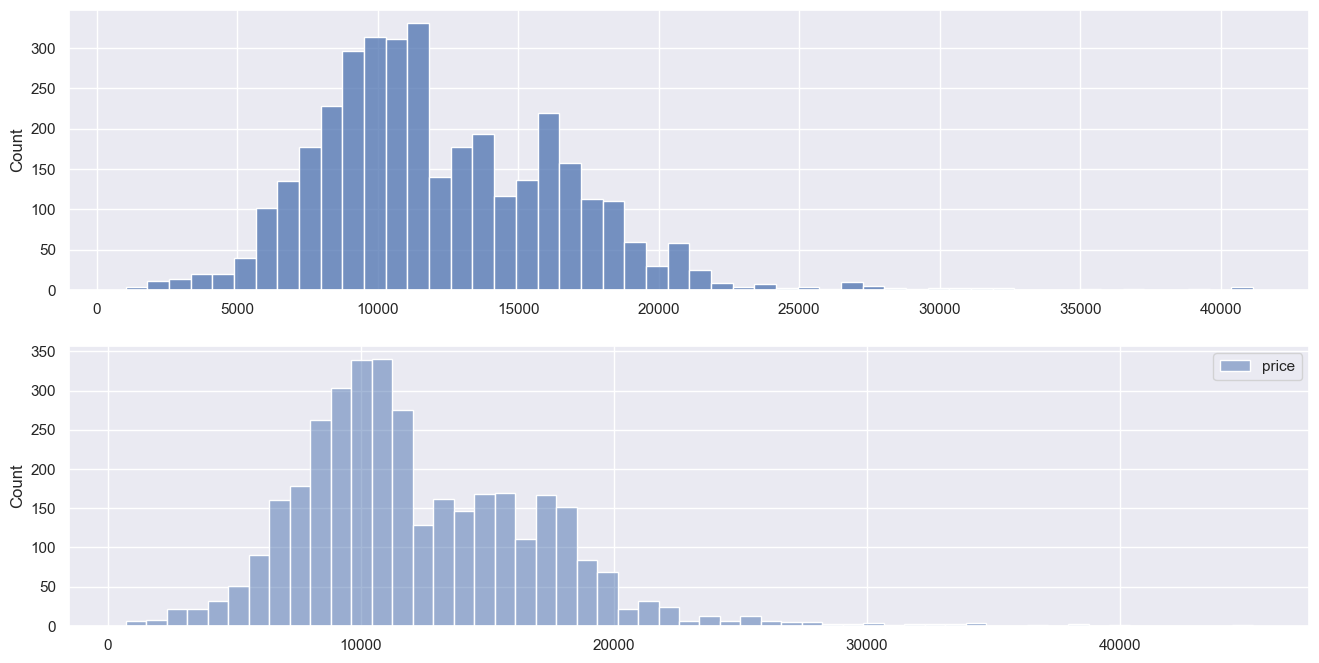

In [2]:
# Plot the Predictions on a Histplot
f, axes = plt.subplots(2, 1, figsize=(16, 8))
# f = plt.figure(figsize=(16, 8))

# draw histogram of price. 
# prediction top, true value below.
sb.histplot(data = y_test_pred, ax = axes[0])
sb.histplot(data = y_test, ax = axes[1])
plt.show()

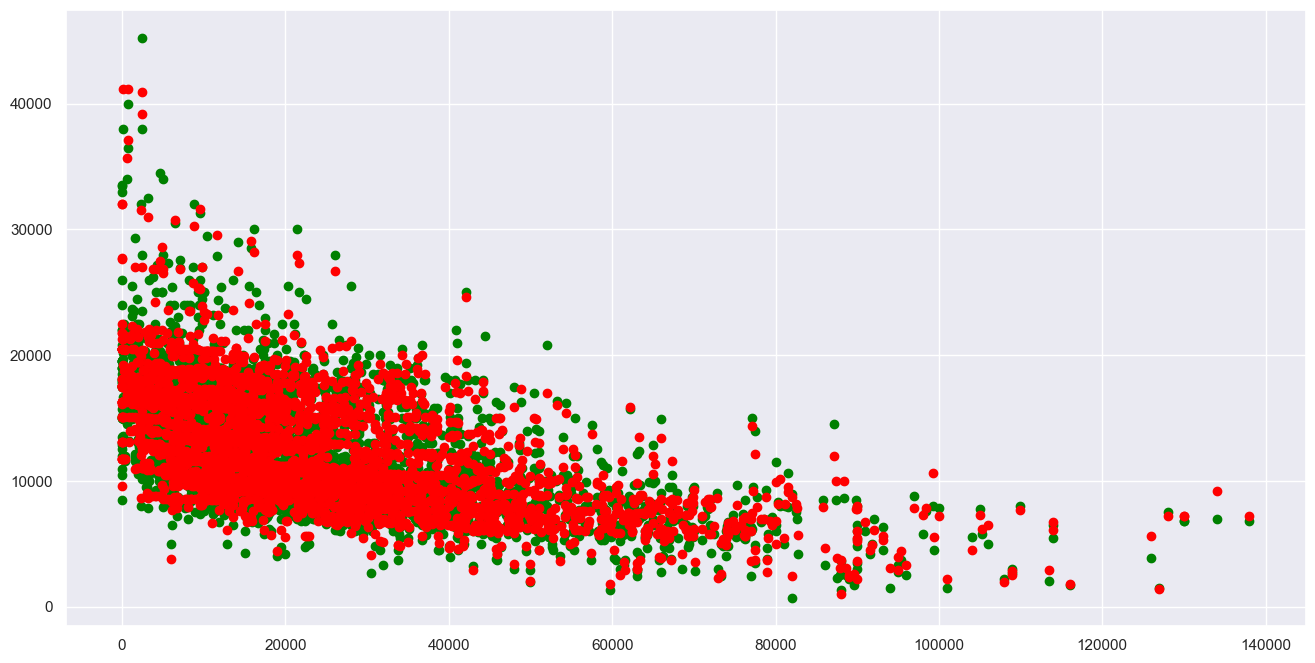

In [3]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))

# plot price against mileage
# green is true values
# red is predictions
plt.scatter(X_test[['mileage']], y_test, color = "green")
plt.scatter(X_test[['mileage']], y_test_pred, color = "red")
plt.show()

# Using Mileage as predictor

In [26]:
# Import the required function from sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import GradientBoostingRegressor
onehot = OneHotEncoder()

car_data = pd.read_csv("cleaned_cardata.csv")
car_data['year'] = car_data['year'].astype('object')
#car_data.info()

car_data_cat = car_data[["model", "transmission", "fuelType"]]
onehot.fit(car_data_cat)
car_data_cat_onehot = pd.DataFrame(onehot.transform(car_data_cat).toarray(),
                                  columns = onehot.get_feature_names_out(car_data_cat.columns))

car_numeric = car_data[['mileage', 'engineSize', 'year']]
car_response = car_data['price']
car_data_ohe = pd.concat([car_numeric, car_data_cat_onehot, car_response],
                        sort = False, axis = 1).reindex(index=car_numeric.index)

# Extract Response and Predictors
y = pd.DataFrame(car_data_ohe['price'])
X = pd.DataFrame(car_data_ohe['mileage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Using Gradient Boosting Regressor and loading it to variable classifier
classifier = GradientBoostingRegressor()  
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

# Fit using Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train.values.ravel())

# Predict 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy for Mileage \t:", model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy for Mileage \t:", model.score(X_test, y_test))
print()

#print("R2 for Train: ", r2_score(y_train, y_train_pred))
#print("R2 for Test: ", r2_score(y_test, y_test_pred))

Train Set : (14372, 1) (14372, 1)
Test Set  : (3594, 1) (3594, 1)
Goodness of Fit of Model 	Train Dataset
Accuracy for Mileage 	: 0.3468246383032435

Goodness of Fit of Model 	Test Dataset
Accuracy for Mileage 	: 0.3454200921503532



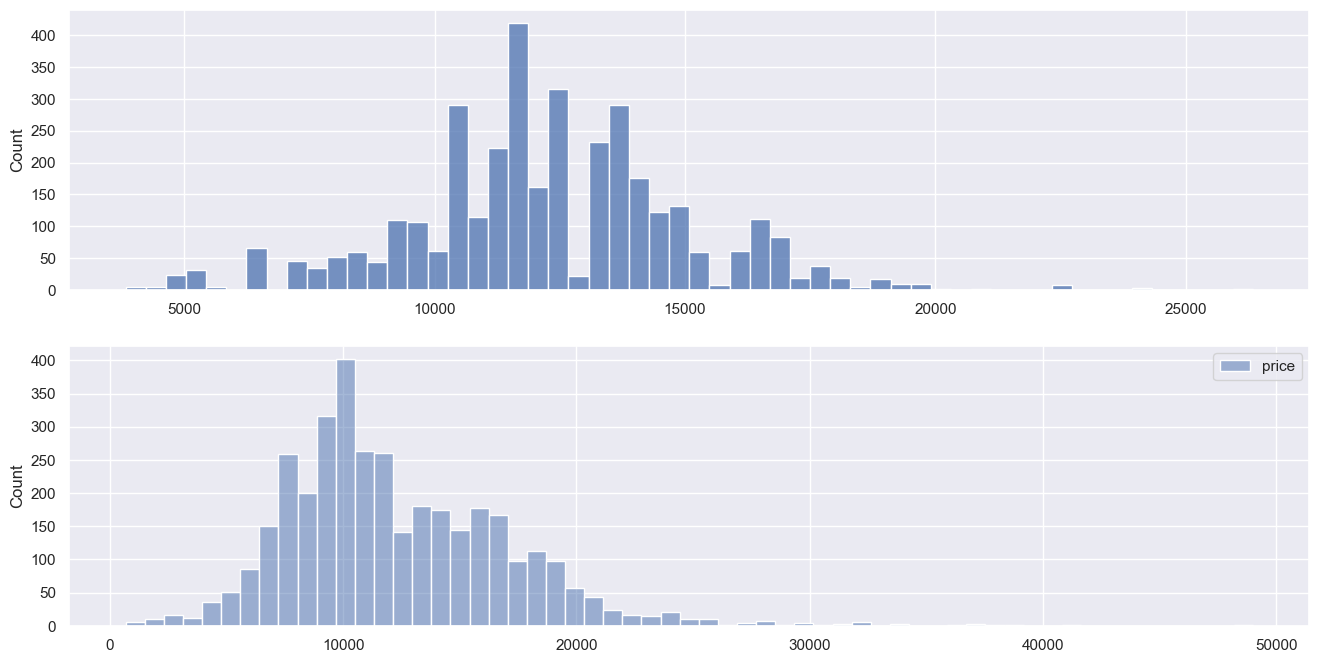

In [5]:
# Plot the Predictions on a Histplot
f, axes = plt.subplots(2, 1, figsize=(16, 8))
# f = plt.figure(figsize=(16, 8))

# draw histogram of price. 
# prediction top, true value below.
sb.histplot(data = y_test_pred, ax = axes[0])
sb.histplot(data = y_test, ax = axes[1])
plt.show()

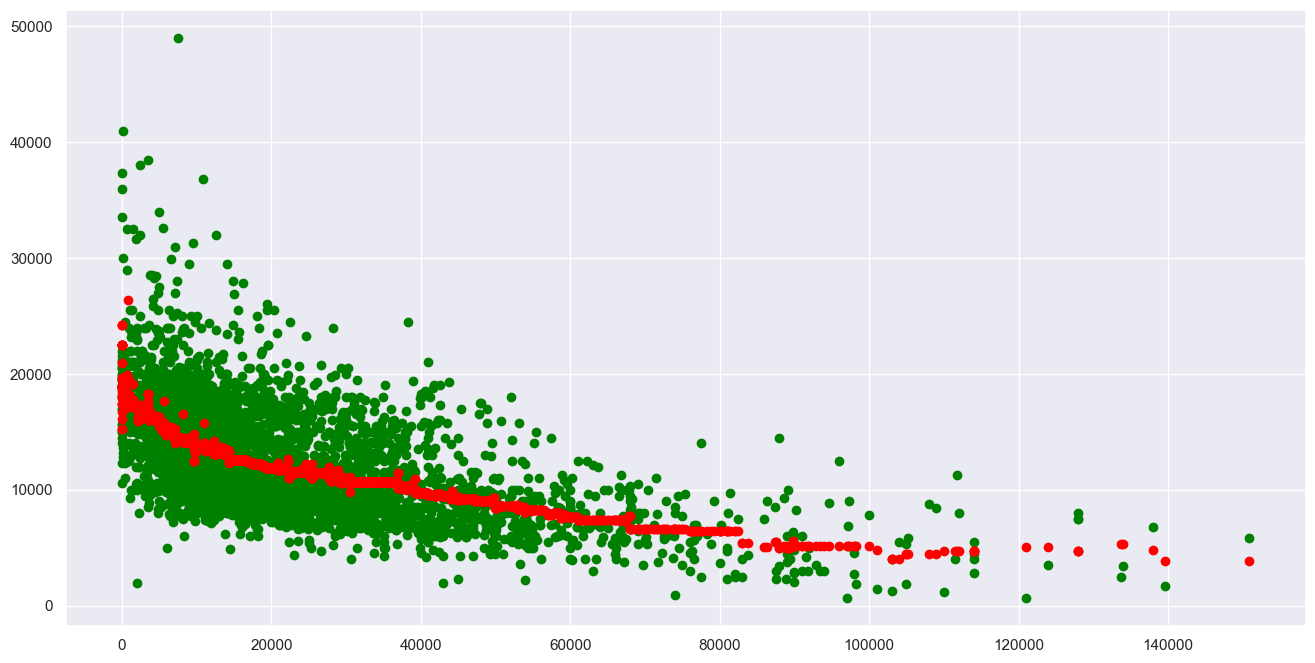

In [7]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))

# plot price against mileage
# green is true values
# red is predictions
plt.scatter(X_test[['mileage']], y_test, color = "green")
plt.scatter(X_test[['mileage']], y_test_pred, color = "red")
plt.show()

# Using Engine Size as predictor

In [25]:
# Import the required function from sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import GradientBoostingRegressor
onehot = OneHotEncoder()

car_data = pd.read_csv("cleaned_cardata.csv")
car_data['year'] = car_data['year'].astype('object')
#car_data.info()

car_data_cat = car_data[["model", "transmission", "fuelType"]]
onehot.fit(car_data_cat)
car_data_cat_onehot = pd.DataFrame(onehot.transform(car_data_cat).toarray(),
                                  columns = onehot.get_feature_names_out(car_data_cat.columns))

car_numeric = car_data[['mileage', 'engineSize', 'year']]
car_response = car_data['price']
car_data_ohe = pd.concat([car_numeric, car_data_cat_onehot, car_response],
                        sort = False, axis = 1).reindex(index=car_numeric.index)

# Extract Response and Predictors
y = pd.DataFrame(car_data_ohe['price'])
X = pd.DataFrame(car_data_ohe['engineSize'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Using Gradient Boosting Regressor and loading it to variable classifier
classifier = GradientBoostingRegressor()  
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

# Fit using Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train.values.ravel())

# Predict 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy for Engine Size \t:", model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy for Engine Size \t:", model.score(X_test, y_test))
print()

#print("R2 for Train: ", r2_score(y_train, y_train_pred))
#print("R2 for Test: ", r2_score(y_test, y_test_pred))

Train Set : (14372, 1) (14372, 1)
Test Set  : (3594, 1) (3594, 1)
Goodness of Fit of Model 	Train Dataset
Accuracy for Engine Size 	: 0.4116587761551632

Goodness of Fit of Model 	Test Dataset
Accuracy for Engine Size 	: 0.40256876108154593



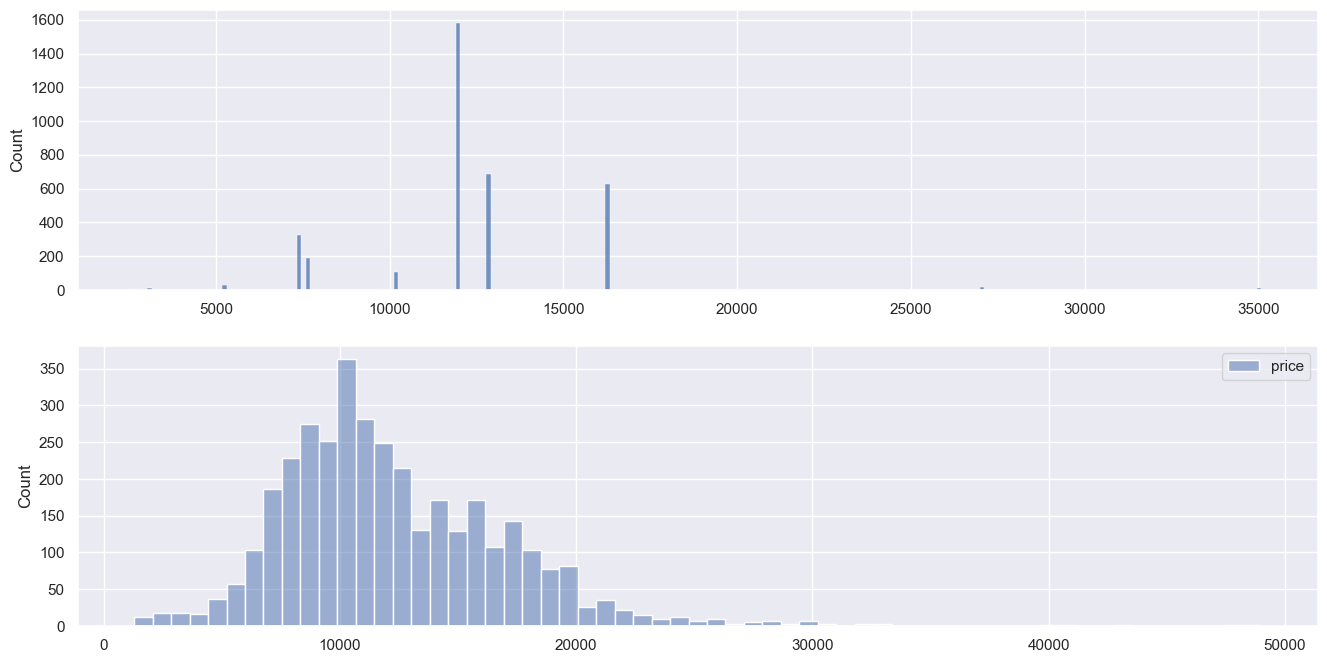

In [2]:
# Plot the Predictions on a Histplot
f, axes = plt.subplots(2, 1, figsize=(16, 8))
# f = plt.figure(figsize=(16, 8))

# draw histogram of price. 
# prediction top, true value below.
sb.histplot(data = y_test_pred, ax = axes[0])
sb.histplot(data = y_test, ax = axes[1])
plt.show()

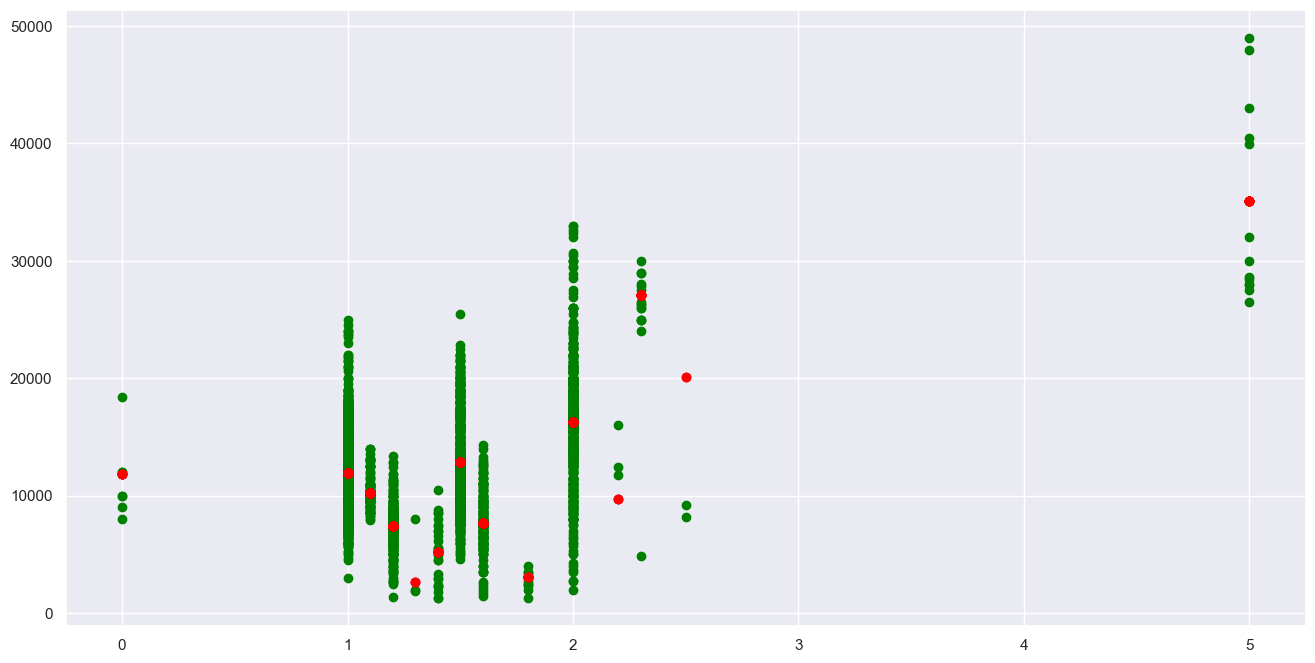

In [3]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))

# plot price against mileage
# green is true values
# red is predictions
plt.scatter(X_test[['engineSize']], y_test, color = "green")
plt.scatter(X_test[['engineSize']], y_test_pred, color = "red")
plt.show()

# Using Year as predictor

In [27]:
# Import the required function from sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import GradientBoostingRegressor
onehot = OneHotEncoder()

car_data = pd.read_csv("cleaned_cardata.csv")
car_data['year'] = car_data['year'].astype('object')
#car_data.info()

car_data_cat = car_data[["model", "transmission", "fuelType"]]
onehot.fit(car_data_cat)
car_data_cat_onehot = pd.DataFrame(onehot.transform(car_data_cat).toarray(),
                                  columns = onehot.get_feature_names_out(car_data_cat.columns))

car_numeric = car_data[['mileage', 'engineSize', 'year']]
car_response = car_data['price']
car_data_ohe = pd.concat([car_numeric, car_data_cat_onehot, car_response],
                        sort = False, axis = 1).reindex(index=car_numeric.index)

# Extract Response and Predictors
y = pd.DataFrame(car_data_ohe['price'])
X = pd.DataFrame(car_data_ohe['year'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Using Gradient Boosting Regressor and loading it to variable classifier
classifier = GradientBoostingRegressor()  
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

# Fit using Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train.values.ravel())

# Predict 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy for year \t:", model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy for year \t:", model.score(X_test, y_test))
print()

#print("R2 for Train: ", r2_score(y_train, y_train_pred))
#print("R2 for Test: ", r2_score(y_test, y_test_pred))

Train Set : (14372, 1) (14372, 1)
Test Set  : (3594, 1) (3594, 1)
Goodness of Fit of Model 	Train Dataset
Accuracy for year 	: 0.47408399711409654

Goodness of Fit of Model 	Test Dataset
Accuracy for year 	: 0.4895054746401831



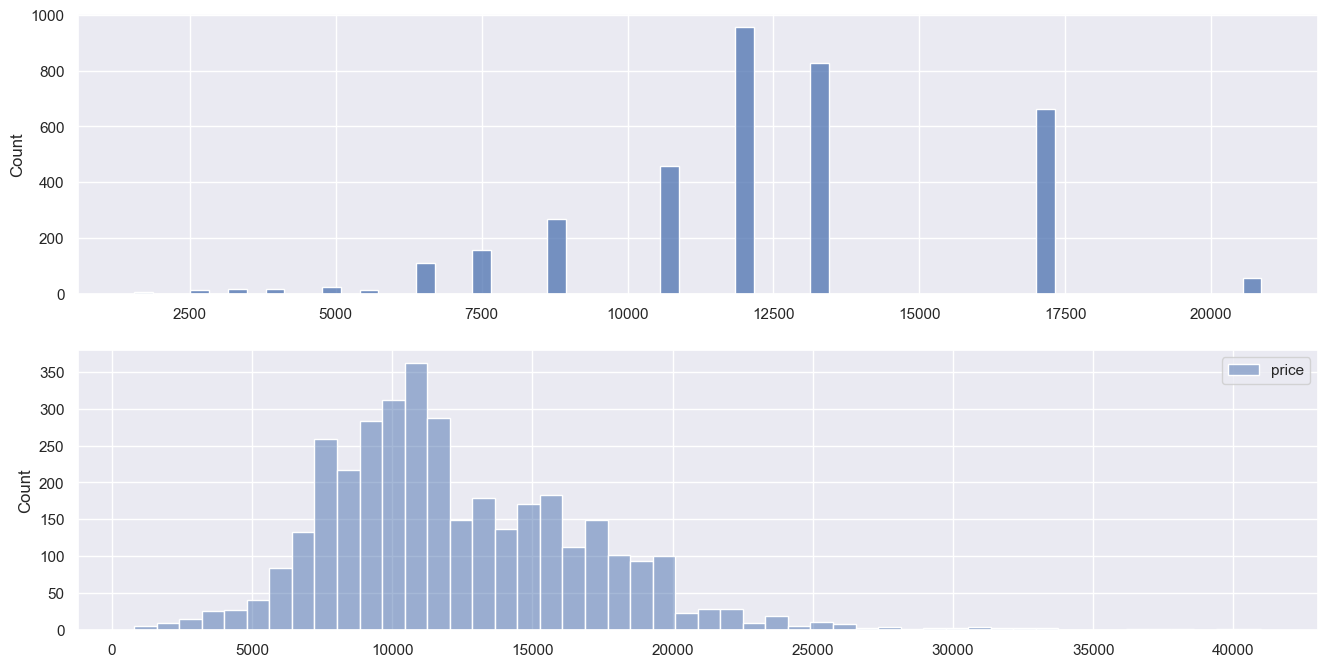

In [9]:
# Plot the Predictions on a Histplot
f, axes = plt.subplots(2, 1, figsize=(16, 8))
# f = plt.figure(figsize=(16, 8))

# draw histogram of price. 
# prediction top, true value below.
sb.histplot(data = y_test_pred, ax = axes[0])
sb.histplot(data = y_test, ax = axes[1])
plt.show()

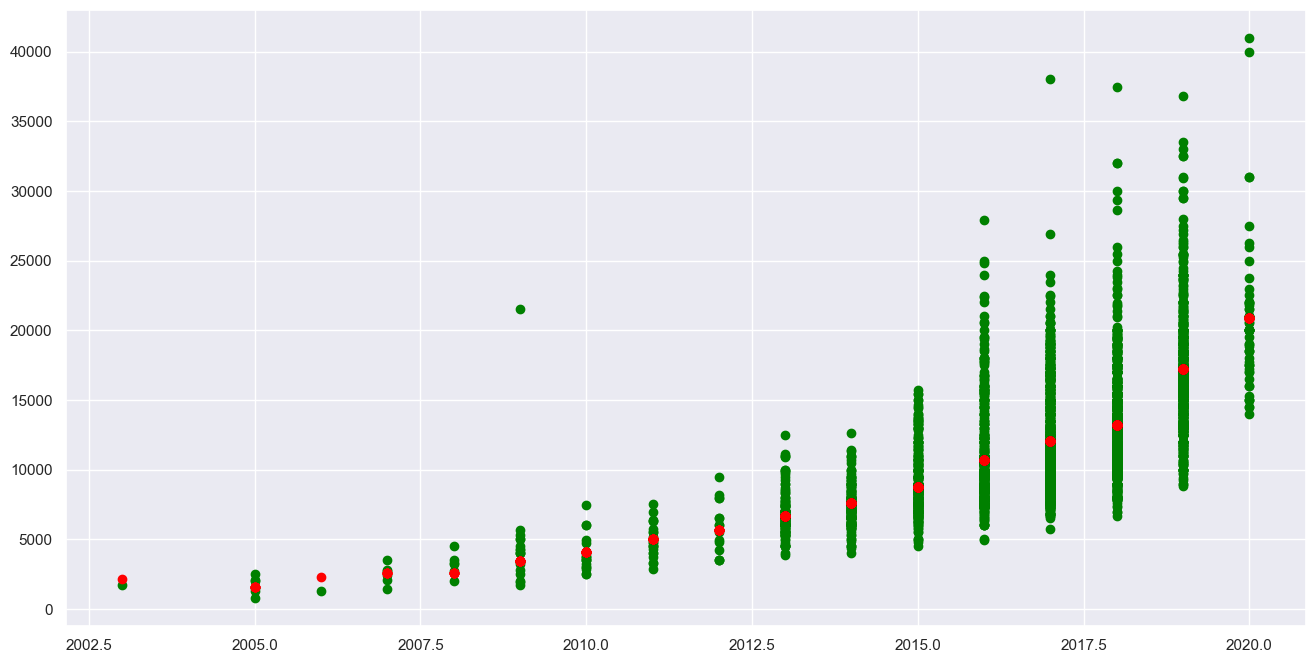

In [11]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))

# plot price against mileage
# green is true values
# red is predictions
plt.scatter(X_test[['year']], y_test, color = "green")
plt.scatter(X_test[['year']], y_test_pred, color = "red")
plt.show()